In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing libraries


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

Analyzing the number of files

In [ ]:
audio_fpath = "/content/gdrive/MyDrive/16000/1-100210-A-36.wav"
# audio_clips = os.listdir(audio_fpath)
# print("No. of .wav files in audio folder = ",len(audio_clips))

In [ ]:
audio_path = "/content/1-115920-A-22.wav"

In [ ]:
x, sr = librosa.load(audio_fpath, sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(22050,) 44100


In [ ]:
ipd.Audio(audio_fpath)

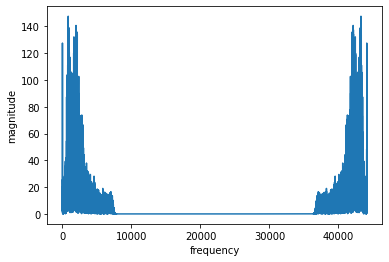

In [ ]:
fft = np.fft.fft(x)
magnitude = np.abs(fft) #Absolute values on the complex values and the magnitude indicates overall frequency contribution to the wave
frequency = np.linspace(0,sr,len(magnitude)) #return evenly spaced numbers over an interval
plt.plot(frequency,magnitude)
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.show()
#Power spectrum, higher frequency less energy

/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=500
  warnings.warn(


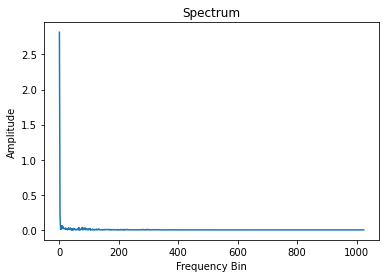

In [ ]:
import numpy as np
n_fft = 500
ft = np.abs(librosa.stft(x[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

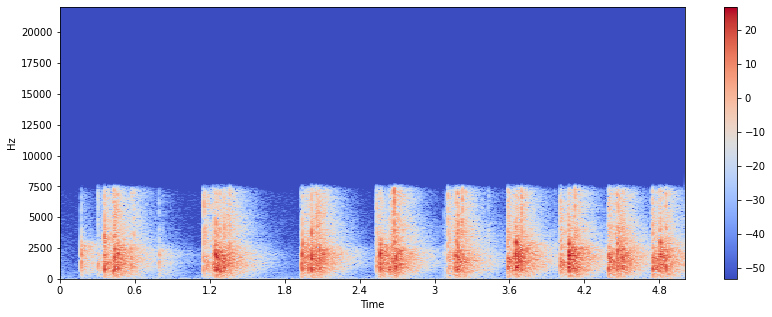

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

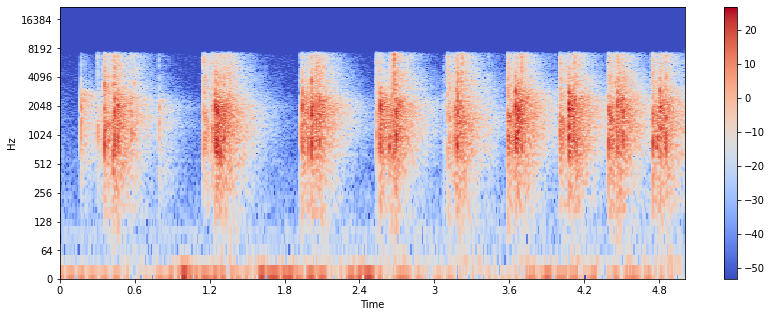

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Pre-processing methods

  1. Zero crossing rate
  2. Spectral centroid
  

Zero crossing

(10000,)

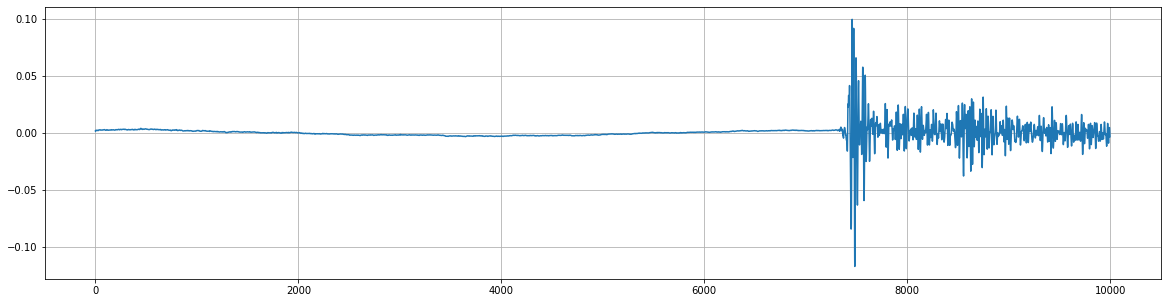

In [ ]:
n0 = 0
n1 = 10000
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape
#The number times over a given interval that the signal’s amplitude crosses a value of zero

Spectral Centroid 

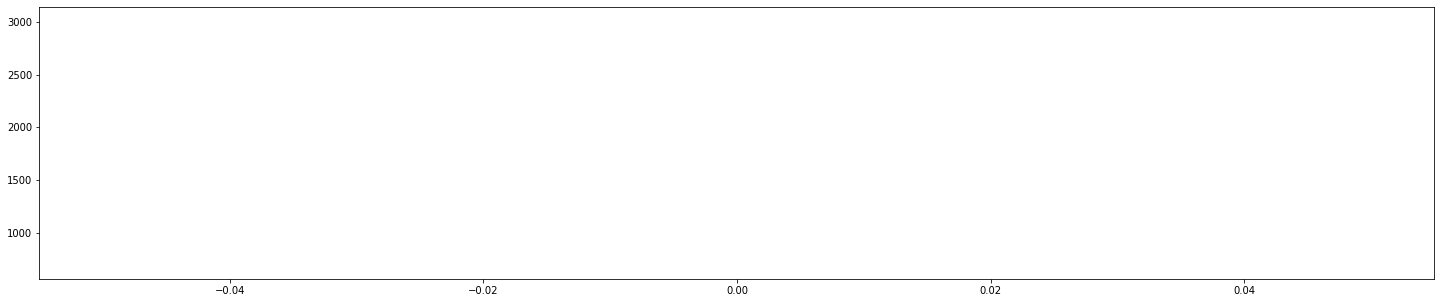

In [ ]:
sc= librosa.feature.spectral_centroid(y=x, sr=sr, n_fft=10240, hop_length=51)
frames = range(len(sc)) #split into different time frames
t = librosa.frames_to_time(frames) #time 
plt.figure(figsize=(25,5))
plt.plot(t, sc, color='r') #t for time - x axis, values of sc as y axis
plt.show()

High-pass filtering method - High-pass filters remove low-frequency (slow) noise and pass high-freqency signals.

In [ ]:
from scipy import signal
import random


def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf

In [ ]:
yf = f_high(x,sr)

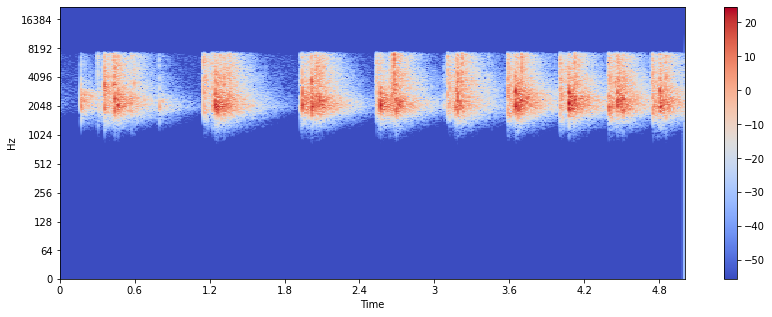

In [ ]:
X = librosa.stft(yf)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
from IPython.display import Audio, IFrame, display
display(Audio(yf, rate=sr))